In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.misc
from PIL import Image
import imageio as iio
from pathlib import Path
import string
import glob
import os

In [2]:
############
###Labels###
#age: from 1 to 116
#gender: 0-male; 1-female
#race: 0-white; 1-black; 2-Asian; 3-Indian; 4-others(like Hispanic, Latino, Middle Eastern)
############

labels = pd.read_csv('./data/labels.csv', header = None)
labels = labels.values
print(labels.shape)
print(labels)

landmarks = pd.read_csv('labels_and_landmarks.csv')
landmarks_only = landmarks[[str(i) for i in range(1,137)]]
print(landmarks)

(23705, 3)
[[100   0   0]
 [100   0   0]
 [100   1   0]
 ...
 [  9   1   4]
 [  9   1   4]
 [  9   1   4]]
       Age  Gender  Race   1   2   3   4   5    6   7  ...  127  128  129  \
0        1       0     2  -4  71  -4  96  -3  120  -1  ...  107  136  130   
1        1       0     2  13  76  13  96  15  117  18  ...  102  137  121   
2        1       0     2  11  62  14  84  18  105  23  ...  108  135  135   
3        6       1     2  36  66  34  86  38  108  45  ...  102  140  120   
4        1       1     2  -3  60  -3  85  -1  110   3  ...  109  137  126   
...    ...     ...   ...  ..  ..  ..  ..  ..  ...  ..  ...  ...  ...  ...   
23700   78       1     0  -1  62  -1  88   0  113   2  ...  110  137  126   
23701   81       1     0   7  56   8  80   9  103  10  ...  100  144  121   
23702   82       1     0  15  66  13  89  15  112  20  ...  102  141  120   
23703   82       1     0  35  64  34  83  36  103  39  ...  105  135  129   
23704   85       1     0  -2  71   0  95   2  

In [3]:
print("labels of ages: {}".format(np.unique(labels[:, 0])))
print("labels of genders: {}".format(np.unique(labels[:, 1])))
print("labels of races: {}".format(np.unique(labels[:, -1])))

labels of ages: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]
labels of genders: [0 1]
labels of races: [0 1 2 3 4]


In [4]:
# read images from Faces folder
images = list()

filelist = glob.glob('./data/Faces/*.jpg')
for file in sorted(filelist, key=lambda s: int(s.strip(string.ascii_letters + "./"))):
    im = iio.imread(file)
    images.append(im)
images = np.array(images)
print(images.shape)

(23705, 200, 200, 3)


In [5]:
LANDMARK_SIZE = 20

def get_landmarks(X, imgNum, landmarks):
    pieces = []
    for i in range(len(landmarks)//2):
        lx = landmarks[2*i]
        ly = landmarks[2*i+1]
        if lx < LANDMARK_SIZE:
            lx = LANDMARK_SIZE
        if 200-LANDMARK_SIZE < lx:
            lx = 200-LANDMARK_SIZE
        if ly < LANDMARK_SIZE:
            ly = LANDMARK_SIZE
        if 200-LANDMARK_SIZE < ly:
            ly = 200-LANDMARK_SIZE
        piece = X[imgNum,lx-LANDMARK_SIZE:lx+LANDMARK_SIZE,ly-LANDMARK_SIZE:ly+LANDMARK_SIZE,:]
        pieces.append(piece)
    return np.array(pieces)

#def flattened_landmarks(X, imgNum, landmarks):
#    return np.array(get_landmarks(X, imgNum, landmarks)).flatten()

def landmarks_all(X, landmarks):
    data = np.memmap("landmark_memory.dat", dtype='uint8', mode="w+", shape=(len(X),len(landmarks[0])//2,2*LANDMARK_SIZE,2*LANDMARK_SIZE,3))
    for i in range(len(X)):
        lm = get_landmarks(X, i, landmarks[i,:])
        if lm is not None:
            np.copyto(data[i], lm, casting='no')
        if i%100 == 0:
            data.flush()
    return data

(40, 40, 3)
(40, 40, 3)
(40, 40, 3)


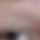

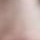

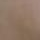

In [6]:
imgs = []
for piece in get_landmarks(images, 50, [40,60,80,100,170,20]):
    print(np.shape(piece))
    imgs.append(Image.fromarray(piece))

display(*imgs)

In [7]:
image_all_pieces = landmarks_all(images, landmarks_only.to_numpy())
print(np.shape(image_all_pieces))

(23705, 68, 40, 40, 3)
